# import Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [5]:
df=pd.read_csv("Loan Data.csv")
print("Shape :",df.shape)

Shape : (614, 13)


# Explore Data

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print("Education: ","\n",df.Education.value_counts())
print("*"*50)
print("Property_Area: ","\n",df.Property_Area.value_counts())
print("*"*50)
print("Credit_History: ","\n",df.Credit_History.value_counts())
print("*"*50)
print("Loan_Amount_Term: ","\n",df.Loan_Amount_Term.value_counts())


Education:  
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
Property_Area:  
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**************************************************
Credit_History:  
 1.0    475
0.0     89
Name: Credit_History, dtype: int64
**************************************************
Loan_Amount_Term:  
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [6]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

## Deal With Missing Values

In [6]:
fil_Col_Cat=["Credit_History","Self_Employed","Gender","Married","Loan_Amount_Term"]
for i in fil_Col_Cat:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [7]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Dependents"].fillna(method="bfill",inplace=True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data visulization

###  categorial Data

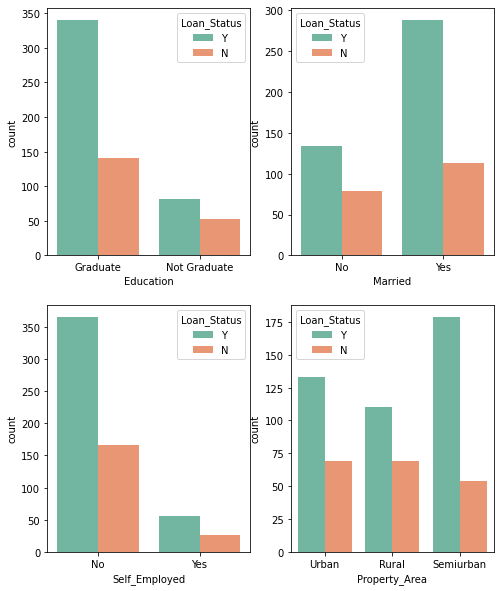

In [7]:
plt.figure(figsize=(8,10))

plt.subplot(2,2,1)
sns.countplot(x ="Education" ,hue="Loan_Status", data=df,palette="Set2")
plt.subplot(2,2,2)
sns.countplot(x="Married",hue="Loan_Status", data=df,palette="Set2")
plt.subplot(2,2,3)
sns.countplot(x="Self_Employed",hue="Loan_Status", data=df ,palette="Set2")
plt.subplot(2,2,4)
sns.countplot(x="Property_Area",hue="Loan_Status", data=df ,palette="Set2")
plt.show()

### numeric data

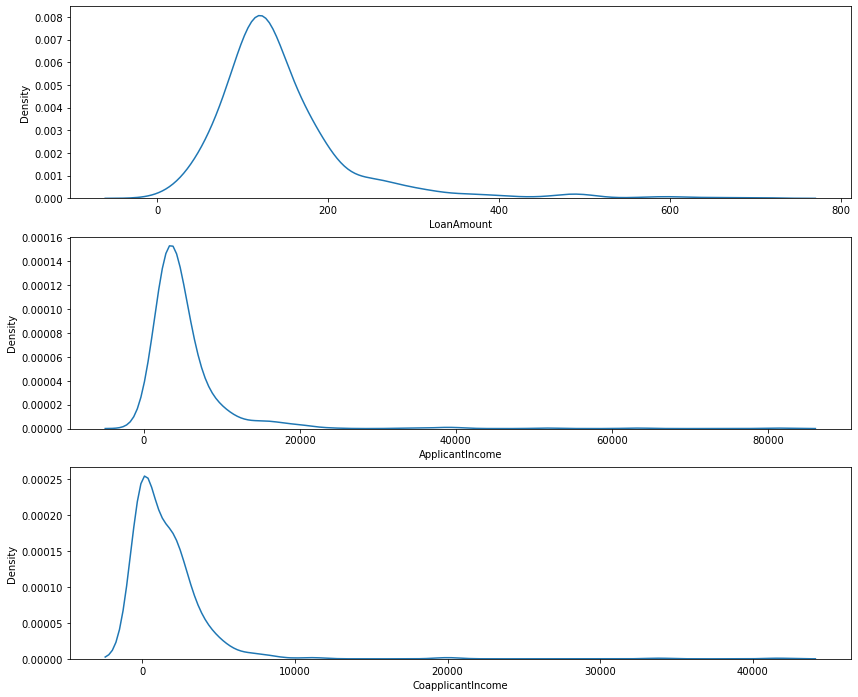

In [11]:
plt.figure(figsize=(14,12))

plt.subplot(3,1,1)
sns.kdeplot(x ="LoanAmount" , data=df)
plt.subplot(3,1,2)
sns.kdeplot(x="ApplicantIncome", data=df)
plt.subplot(3,1,3)
sns.kdeplot(x="CoapplicantIncome", data=df)
plt.show()

# Data Preprocessing

#### i want concat all income together

In [8]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

#### Drop ID Column

In [9]:
df.drop(["Loan_ID"],axis=1,inplace=True)

#### Scale 

In [10]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()
df["Income"]=scaler.fit_transform(df[["Income"]])

In [38]:
df["LoanAmount"]=scaler.fit_transform(df[["LoanAmount"]])

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [111]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [112]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].apply(lambda x:str(x))
df['le_Loan_Amount_Term'] = le.fit_transform(df['Loan_Amount_Term'])


In [122]:
print("Gender class :\n",le_Gender.classes_)
print("*"*50)
print("Married class :\n",le_Married.classes_)
print("*"*50)
print("Education class :\n",le_Education.classes_)
print("*"*50)
print("Self_Employed class :\n",le_Self_Employed.classes_)
print("*"*50)
print("Property_Area class :\n",le_Property_Area.classes_)
print("*"*50)
print("Dependents class :\n",le_Dependents.classes_)
print("*"*50)
print("Loan_Amount_Term class :\n",le_Term.classes_)
print("*"*50)
print("Loan_Status class :\n",le_Loan_Status.classes_)
print("*"*50)

Gender class :
 ['Female' 'Male']
**************************************************
Married class :
 ['No' 'Yes']
**************************************************
Education class :
 ['Graduate' 'Not Graduate']
**************************************************
Self_Employed class :
 ['No' 'Yes']
**************************************************
Property_Area class :
 ['Rural' 'Semiurban' 'Urban']
**************************************************
Dependents class :
 [0 1 2 3]
**************************************************
Loan_Amount_Term class :
 ['12.0' '120.0' '180.0' '240.0' '300.0' '36.0' '360.0' '480.0' '60.0'
 '84.0']
**************************************************
Loan_Status class :
 [0 1]
**************************************************


<AxesSubplot:>

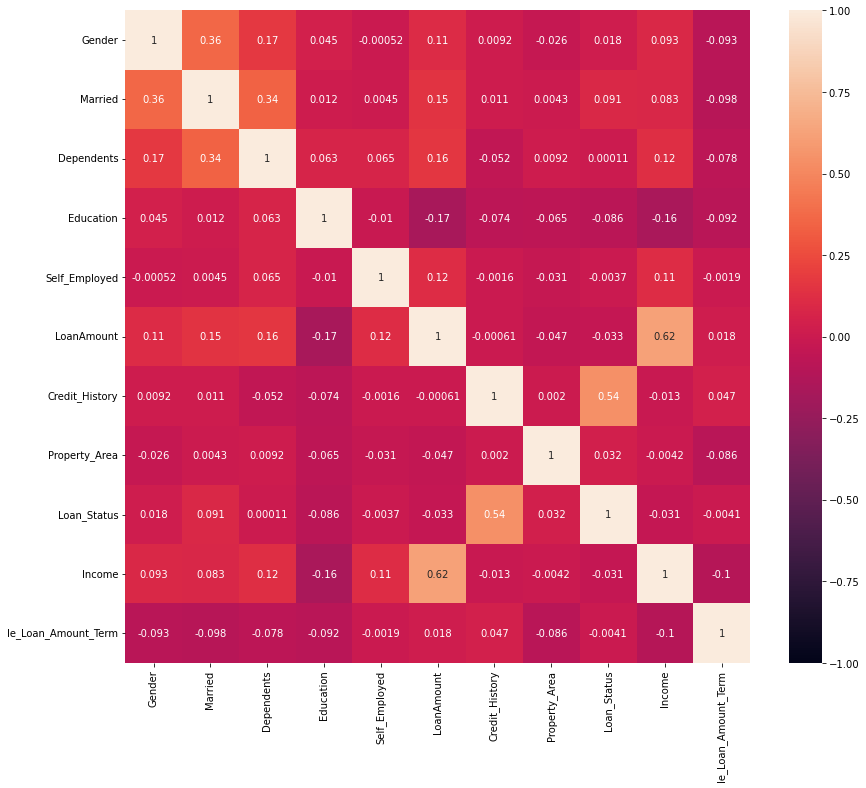

In [43]:
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),annot=True,cbar=True,vmax=1,vmin=-1)

# Spilt Data

In [44]:
from sklearn.model_selection import train_test_split
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Evalute

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def evaluate(model,y_true):
    y_pred=model.predict(X_test)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    
    print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
print(" Train score:",DT.score(X_train,y_train))
evaluate(DT,y_test)

 Train score: 1.0
  pre: 0.725
  rec: 0.733
  f1: 0.729
  loss: 12.335
  acc: 0.643


# RF Model

In [119]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=41,max_depth=5)
RF.fit(X_train,y_train)
print("train score:",RF.score(X_train,y_train))

evaluate(RF,y_test)


train score: 0.8434782608695652
  pre: 0.758
  rec: 0.960
  f1: 0.847
  loss: 7.850
  acc: 0.773


array([0.0162867 , 0.03088812, 0.02257254, 0.02421665, 0.01099391,
       0.10480866, 0.02980436, 0.57587439, 0.0402364 , 0.13153644,
       0.01278184])

<AxesSubplot:>

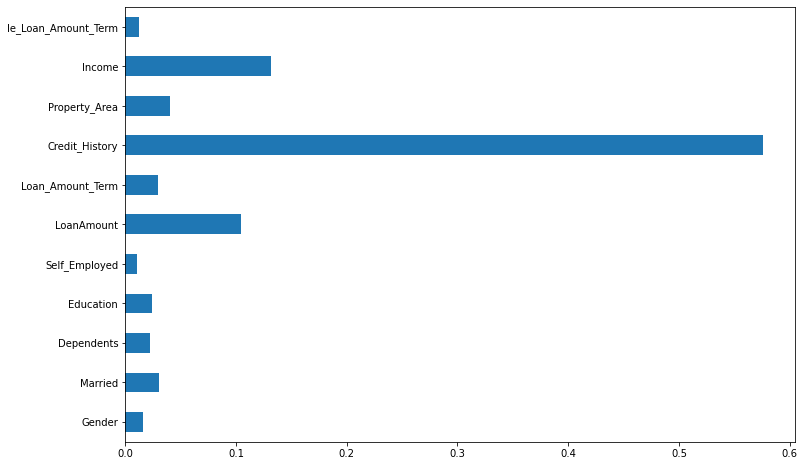

In [121]:
importances=pd.Series(RF.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

# Gradient Boost

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=10)
GB.fit(X_train,y_train)
print("Train score:",GB.score(X_train,y_train))

evaluate(GB,y_test)


Train score: 0.8326086956521739
  pre: 0.746
  rec: 0.960
  f1: 0.840
  loss: 8.298
  acc: 0.760


# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print("Train score:",GNB.score(X_train,y_train))
evaluate(GNB,y_test)

Train score: 0.8239130434782609
  pre: 0.769
  rec: 0.921
  f1: 0.838
  loss: 8.074
  acc: 0.766
